# K-Means clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
type(iris['data'])

numpy.ndarray

In [4]:
dir(iris) #attributes 확인

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                         columns= iris['feature_names'] + ['target'])

In [6]:
iris_data = pd.DataFrame(iris.data)

In [7]:
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_data.columns = ["sepal length","sepal width","petal length","petal width"]

In [9]:
iris_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_data.shape

(150, 4)

데이터 눈으로 확인하기

In [11]:
import seaborn as sns

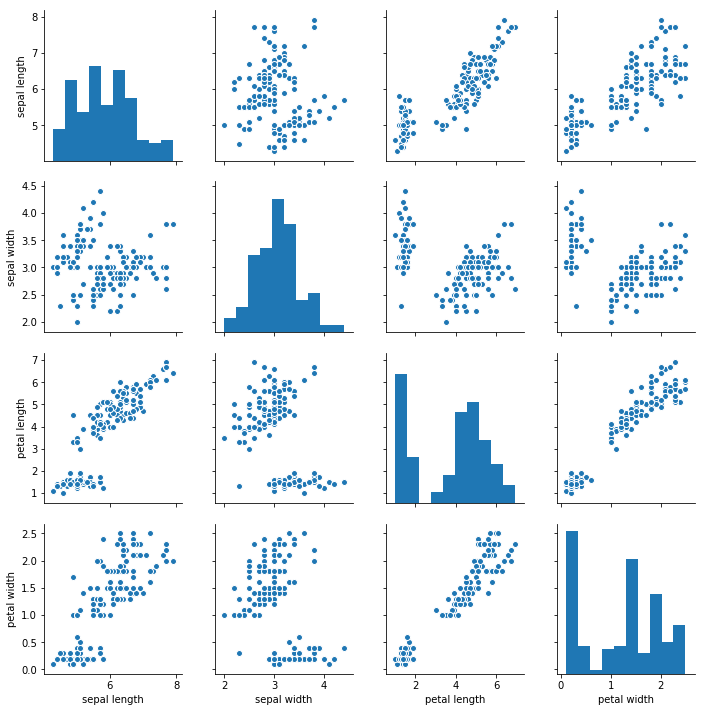

In [12]:
sns.pairplot(iris_data)

seaborn
https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

# k-means clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmns2 = KMeans(n_clusters = 2, init = 'random', max_iter=1) #모델명을 kmns라고 정한 것

In [15]:
kmns2

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=2,
    n_init=10, n_jobs=1, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

In [16]:
kmns2.fit(iris_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=2,
    n_init=10, n_jobs=1, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

In [17]:
kmns2_predict = kmns2.predict(iris_data)

In [18]:
predict_df = pd.DataFrame(kmns2_predict)
predict_df.columns = ["cluster"]

In [21]:
predict_df.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [22]:
kmns2_labeled = pd.concat([iris_data,predict_df], axis = 1)
kmns2_labeled.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
c0, c1 = kmns2.cluster_centers_

In [24]:
c0, c1

(array([5.006, 3.418, 1.464, 0.244]), array([6.262, 2.872, 4.906, 1.676]))

In [ ]:
kmns2.score(iris_data) #이 score가 무엇인가

# 시각화/pairplot

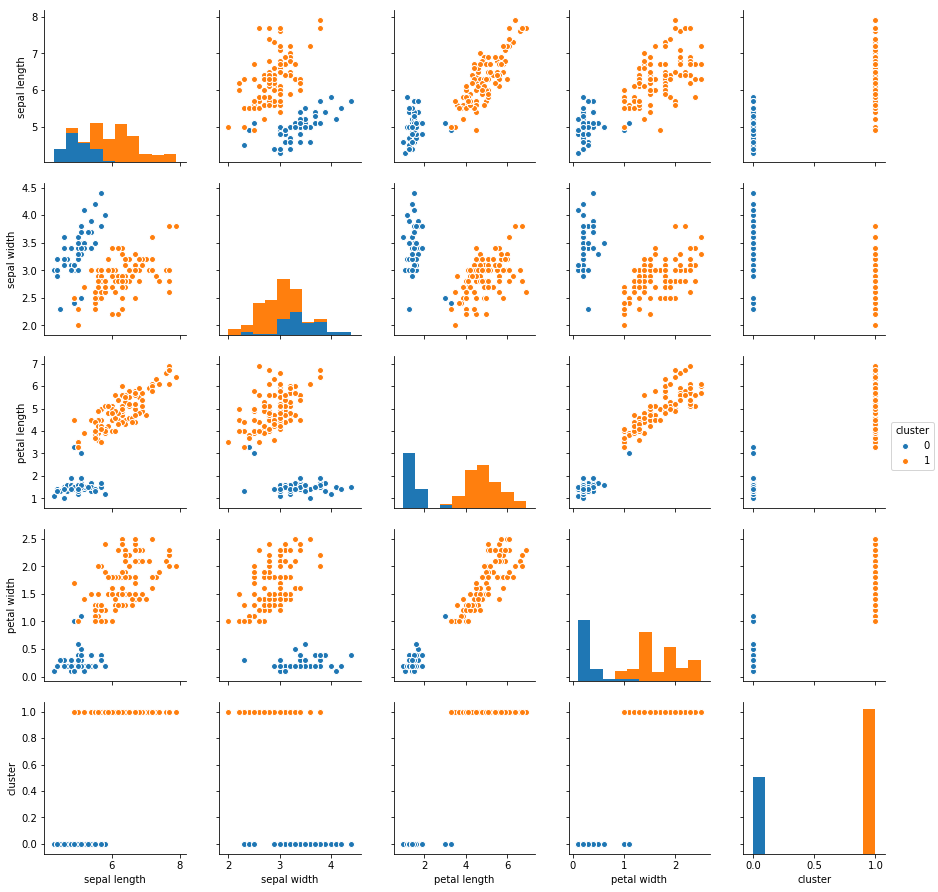

In [25]:
sns.pairplot(kmns2_labeled, hue = "cluster")

https://seaborn.pydata.org/generated/seaborn.pairplot.html

# 다른 인자로 test

In [ ]:
#kmnsdefault = KMeans(algorithm ='auto')

In [26]:
kmns_model = KMeans(n_clusters = 4, init = 'random', max_iter=100)
kmns_model.fit(iris_data)
kmns_model_predict = kmns_model.predict(iris_data)

In [27]:
predict_df = pd.DataFrame(kmns_model_predict)
predict_df.columns = ["cluster"]
kmns_model_labeled = pd.concat([iris_data,predict_df], axis = 1)
kmns_model_labeled.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [28]:
c0, c1, c2, c3 = kmns_model.cluster_centers_ #k수만큼 변수 할당 주의

In [29]:
c0, c1, c2, c3

(array([6.2525, 2.855 , 4.815 , 1.625 ]),
 array([5.53214286, 2.63571429, 3.96071429, 1.22857143]),
 array([6.9125  , 3.1     , 5.846875, 2.13125 ]),
 array([5.006, 3.418, 1.464, 0.244]))

In [30]:
kmns_model.score(iris_data)

-57.317873214285946

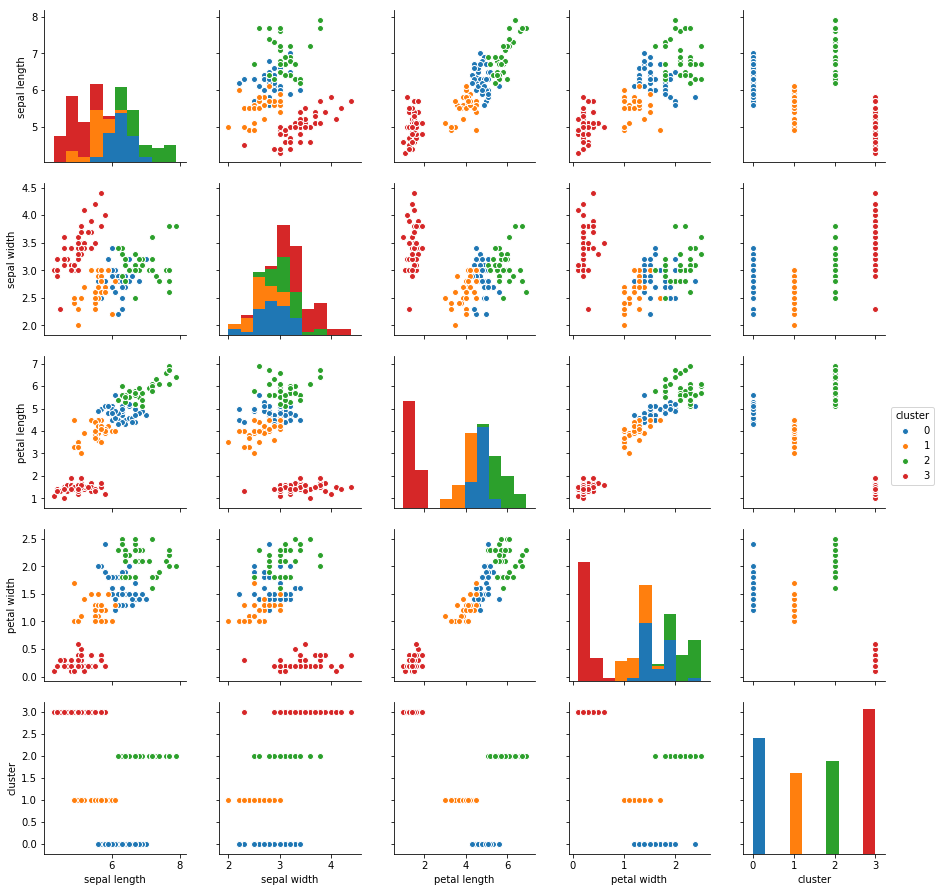

In [31]:
sns.pairplot(kmns_model_labeled, hue = "cluster")